[The challenges of modeling churn](https://neilpatel.com/blog/modeling-churn/)

[Why churn analysis is valuable for companies](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[Git social](https://github.com/VinaySagar92/Git-Social)

[Azure revenue](https://www.forbes.com/sites/bobevans1/2018/10/29/1-microsoft-beats-amazon-in-12-month-cloud-revenue-26-7-billion-to-23-4-billion-ibm-third/#2c9e12912bf1)

[Why did Microsoft pay so much for GitHub](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import helper as h

[Group each in BigQuery](https://stackoverflow.com/questions/22600299/understanding-resources-exceeded-during-query-execution-with-group-each-by-in)

In [2]:
user_data = h.get_merged_data(appName='data-exploration', year='2017').toPandas()
user_data.head().transpose()

% of users dropped 51.01494396014944


,0,1,2,3,4
login,0loky0,1xPdd,2582056905xy,AJ340,AaronWB
followers_count,0,0,2,3,3
following_count,1,0,6,6,0
blog,0,0,0,1,1
company,0,0,0,0,0
created_at,2011-05-24 20:15:25+00:00,2014-07-11 03:45:56+00:00,2014-04-24 14:51:26+00:00,2016-04-15 18:12:45+00:00,2014-02-11 15:03:04+00:00
public_repos_count,7,0,35,17,25
public_gists_count,0,0,0,0,1
hireable,1,0,0,0,0
updated_at,2019-01-09 15:03:59+00:00,2018-12-16 00:55:16+00:00,2018-10-18 01:47:18+00:00,2019-01-07 16:25:43+00:00,2019-01-20 11:57:00+00:00


In [3]:
user_data = h.add_time_columns(user_data)
user_data.dtypes

login                                          object
followers_count                                 int32
following_count                                 int32
blog                                            int32
company                                         int32
created_at                             datetime64[ns]
public_repos_count                            float64
public_gists_count                            float64
hireable                                        int32
updated_at                                     object
time_between_first_last_event                 float64
last_event                             datetime64[ns]
first_event                            datetime64[ns]
frequency                                       int32
second_period_event_count                       int32
CommitCommentEvent_count                        int32
CreateEvent_count                               int32
DeleteEvent_count                               int32
ForkEvent_count             

In [4]:
user_data = user_data.dropna()
user_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers_count,94310.0,11.980045,114.937344,0.000000,0.000000,2.000000,7.000000,20127.000000
following_count,94310.0,10.372665,432.177574,0.000000,0.000000,1.000000,6.000000,129323.000000
blog,94310.0,0.285442,0.451627,0.000000,0.000000,0.000000,1.000000,1.000000
company,94310.0,0.256070,0.436463,0.000000,0.000000,0.000000,1.000000,1.000000
public_repos_count,94310.0,21.627547,82.038229,0.000000,5.000000,11.000000,23.000000,18856.000000
public_gists_count,94310.0,3.118874,15.056761,0.000000,0.000000,0.000000,1.000000,1291.000000
hireable,94310.0,0.162507,0.368917,0.000000,0.000000,0.000000,0.000000,1.000000
time_between_first_last_event,94310.0,76.193578,55.346764,0.000000,14.086762,84.971528,129.877483,151.995266
frequency,94310.0,51.902587,117.542238,1.000000,4.000000,14.000000,46.000000,1499.000000
second_period_event_count,94310.0,44.391390,111.841298,0.000000,1.000000,9.000000,37.000000,1490.000000


/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


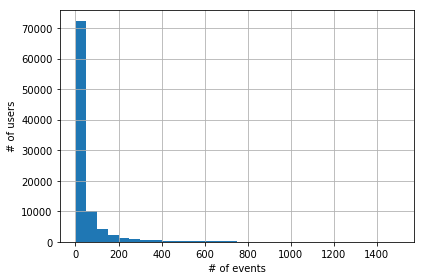

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.frequency.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_firstHalf2016.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


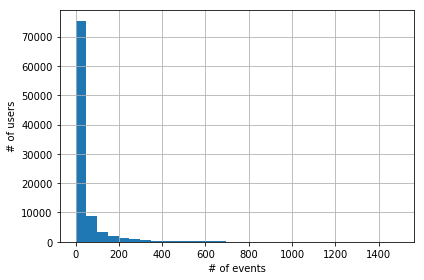

In [23]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.second_period_event_count.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_secondHalf2016.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56d81dfcf8>,
      dtype=object)

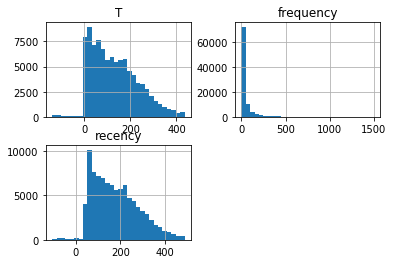

In [7]:
user_data[['frequency', 'T', 'recency']].hist(bins=30)

In [8]:
print('{0}% of users churned in second period'.format(
    np.round(np.sum(user_data.second_period_event_count < 1) / len(user_data) * 100, 2)))

21.83% of users churned in second period


Text(0, 0.5, '# of users')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


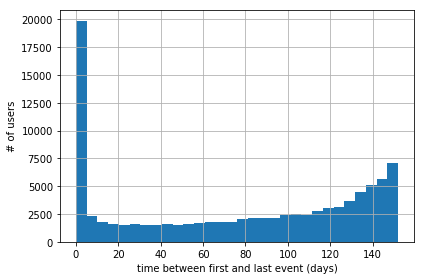

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
user_data.time_between_first_last_event.hist(ax=ax, bins=30)
ax.set_xlabel('time between first and last event (days)')
ax.set_ylabel('# of users')


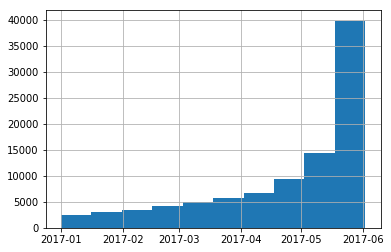

In [10]:
user_data.last_event.hist()

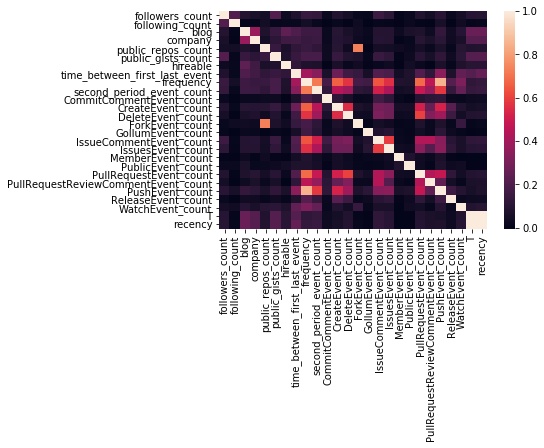

In [11]:
corr = user_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

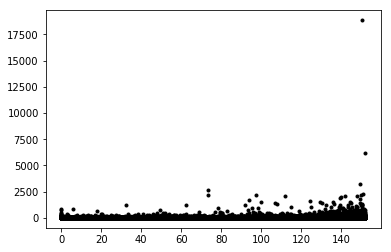

In [12]:
fig, ax = plt.subplots(1,1)

ax.plot(user_data.time_between_first_last_event, user_data.public_repos_count, 'k.')

In [13]:
churned = user_data[user_data.second_period_event_count == 0]
active = user_data[user_data.second_period_event_count > 0]

In [14]:
print('N churned {0}, N active {1}'.format(len(churned), len(active)))

N churned 20588, N active 73722


In [15]:
def plot_active_VS_churned(predictor='frequency'):
    fig, ax = plt.subplots(1,1)
    fig.set_tight_layout(True)

    ax.bar([1, 2], [churned[predictor].mean(), active[predictor].mean()], 
           yerr=[churned[predictor].std() / np.sqrt(len(churned)), 
                 churned[predictor].std() / np.sqrt(len(churned))])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['churned', 'active'])
    ax.set_ylabel(predictor + ' (Jan-May 2016)')

    fig.savefig('figures/' + predictor + '_churnedVSactive.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


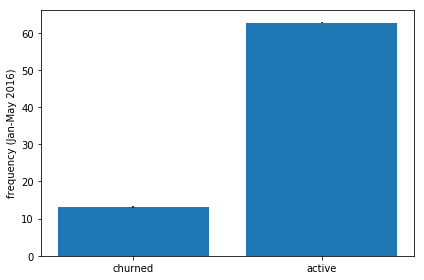

In [16]:
plot_active_VS_churned('frequency')

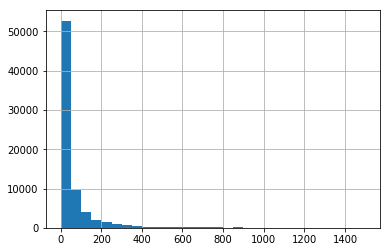

In [17]:
active.frequency.hist(bins=30)

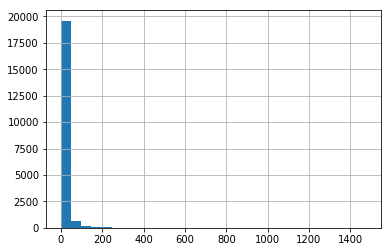

In [18]:
churned.frequency.hist(bins=30)

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


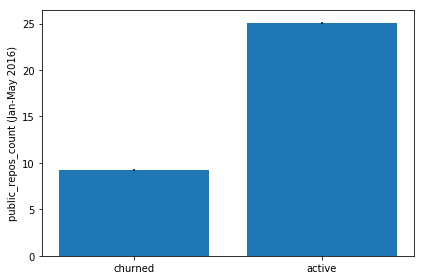

In [19]:
plot_active_VS_churned('public_repos_count')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


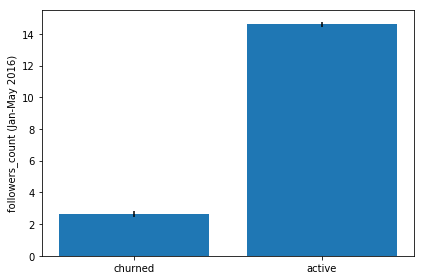

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


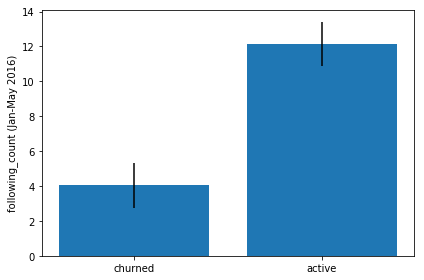

In [20]:
plot_active_VS_churned('followers_count')
plot_active_VS_churned('following_count')

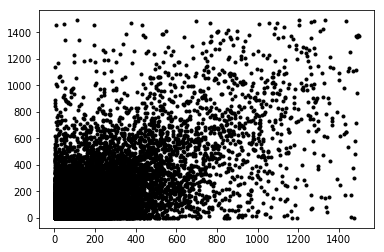

In [21]:
plt.plot(user_data.frequency, user_data.second_period_event_count, 'k.')